# Credit Card Fraud Detection

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-0">Important libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading data</a></span></li><li><span><a href="#Understanding-our-data" data-toc-modified-id="Understanding-our-data-2">Understanding our data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-3">Correlation analysis</a></span></li><li><span><a href="#Fraud/-non-Fraud-ratio" data-toc-modified-id="Fraud/-non-Fraud-ratio-4">Fraud/ non-Fraud ratio</a></span></li><li><span><a href="#Traditional-way-of-catching-fraud" data-toc-modified-id="Traditional-way-of-catching-fraud-5">Traditional way of catching fraud</a></span></li><li><span><a href="#XY-Split" data-toc-modified-id="XY-Split-6">XY Split</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7">Logistic Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-8">KNN</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-9">Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-10">Random Forest</a></span></li><li><span><a href="#Adaboots" data-toc-modified-id="Adaboots-11">Adaboots</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-12">Gradient Boosting</a></span></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-13">Model Comparison</a></span></li><li><span><a href="#Logistic-Regression-with-hyperparameter-tunning" data-toc-modified-id="Logistic-Regression-with-hyperparameter-tunning-14">Logistic Regression with hyperparameter tunning</a></span></li><li><span><a href="#Synthetic-Minority-Oversampling-Technique-(SMOTE)" data-toc-modified-id="Synthetic-Minority-Oversampling-Technique-(SMOTE)-15">Synthetic Minority Oversampling Technique (SMOTE)</a></span></li><li><span><a href="#Logistic-Regression-combined-with-SMOTE" data-toc-modified-id="Logistic-Regression-combined-with-SMOTE-16">Logistic Regression combined with SMOTE</a></span></li></ul></div>

## Important libraries

In [1]:
#pandas and numpy
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#hyperparameters tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from collections import Counter

#others
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree
from sklearn import metrics



## Loading data

In [2]:

df=pd.read_csv("Data/creditcard/creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Understanding our data


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Do we have any missing value?
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#According to the dataset description the features from "V1" to "V28" are the result of PCA(Principal Components Analysis). 
#We know that features must be scaled before using this technique. 
#However the features "Time" and "Amount" are not scaled we should scaled them before continuing with our analysis. 

df['Amount_scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_scaled'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))


#Now we have to drop from our dataset the features "Time" and "Amount":
df=df.drop(columns=['Amount', 'Time'],axis=1)






In [7]:
list(df.columns) 
df = df[[
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount_scaled',
 'Time_scaled',
 'Class']]

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,1.641931,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,1.641952,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,1.641974,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,1.641974,0


## Correlation analysis

In [8]:
df[df.columns[0:]].corr()['Class'][:].sort_values(ascending=False)

Class            1.000000
V11              0.154876
V4               0.133447
V2               0.091289
V21              0.040413
V19              0.034783
V20              0.020090
V8               0.019875
V27              0.017580
V28              0.009536
Amount_scaled    0.005632
V26              0.004455
V25              0.003308
V22              0.000805
V23             -0.002685
V15             -0.004223
V13             -0.004570
V24             -0.007221
Time_scaled     -0.012323
V6              -0.043643
V5              -0.094974
V9              -0.097733
V1              -0.101347
V18             -0.111485
V7              -0.187257
V3              -0.192961
V16             -0.196539
V10             -0.216883
V12             -0.260593
V14             -0.302544
V17             -0.326481
Name: Class, dtype: float64

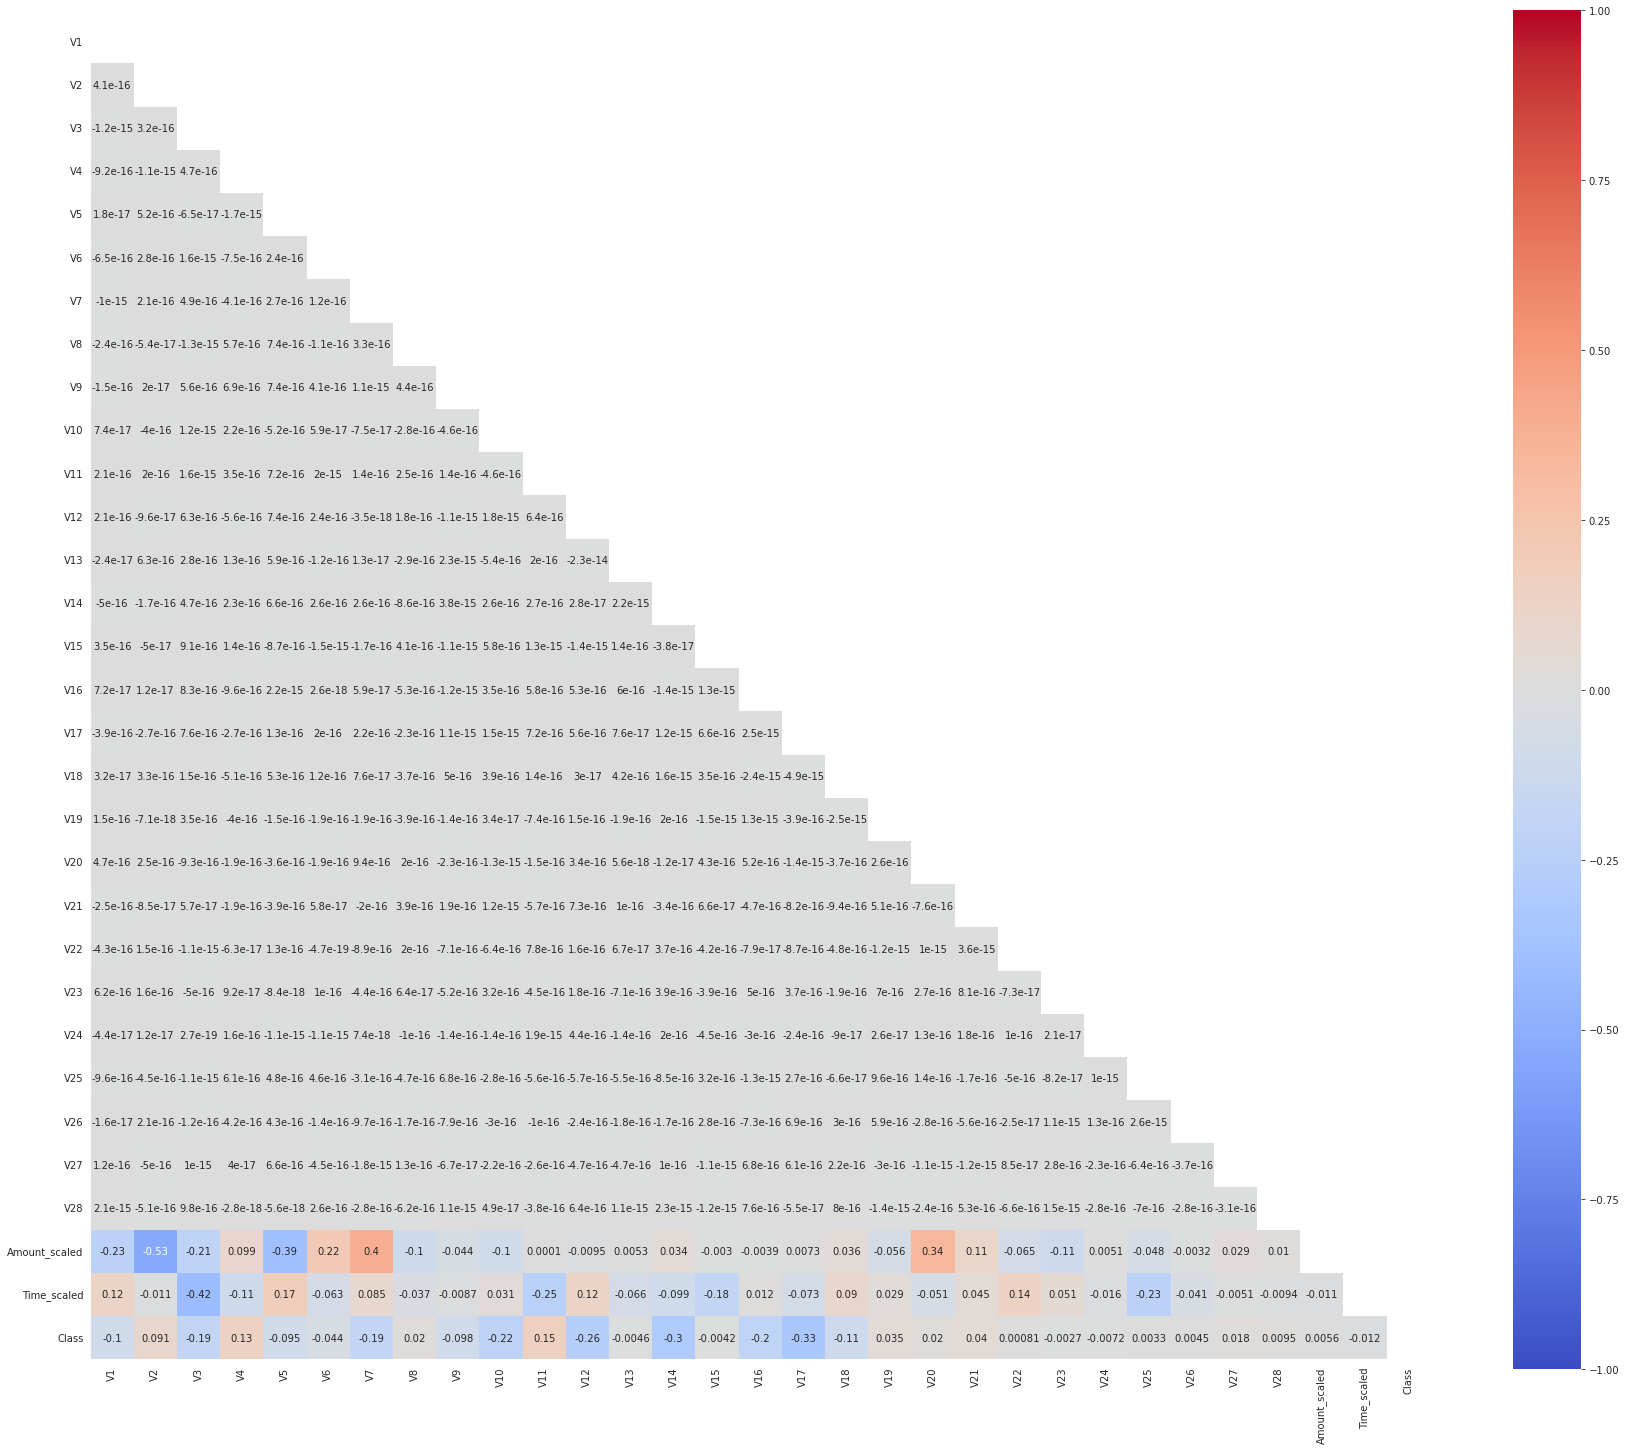

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 25))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Fraud/ non-Fraud ratio

 the feature "Class" is our target variable. This variable has two possible values: 
 1 for fraudulent transactions and 0 for no fraudulent transactions. 
A very commun problem in classification datasets is classs imbalance. This means that the dataset contains an imbalance number of fraudulents and no-fraudulents transactions. ML algorithms works better when the different classes are equally represented  

In [10]:
y=df['Class'].value_counts()
y

0    284315
1       492
Name: Class, dtype: int64

In [11]:
#ratio of fraudulent transactions
y/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can see that fraudulent transactions represent only 0.9901% of our datasets meanwhile non-fraudulent transactions respresent 99.0099%.
it is confirmed we have class imbalance in our dataset. 
 


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

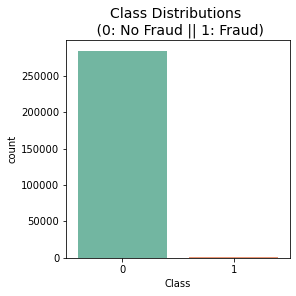

In [12]:
#Visualizations can be very usefull to detect the class imbalance:
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot('Class', data=df, palette="Set2")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [13]:
#We can also use a scatter plot to see our class imbalance. 
#First, we need to convert our dataframe in 2 variables:

X=df.iloc[:,0:30].values
y=df.Class.values


In [14]:
def plot_data(X: np.ndarray, y: np.ndarray):
    
 
    sns.set_palette("Set2")
    
    sns.scatterplot(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    sns.scatterplot(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    
    plt.legend()
    
    return plt.show()

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


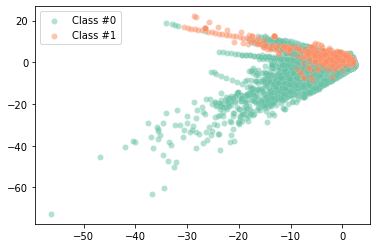

In [15]:
plot_data(X,y)

The plot helps us to see the data imbalance problem very clear. 

## Traditional way of catching fraud
First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.


In [16]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234,0.000513
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382,-0.296223


In [17]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V7'] < -6), 1, 0)

In [18]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0    1
Actual Fraud              
0              283772  543
1                 352  140


With this first approach we have detected 170 of 492 fraudulent cases, but we got 1226 false positives. Now we will see how we can improve these numbers with ML

In [19]:
#We do not need the feature "flag as fraud" for this analysis, so I will delete it
df=df.drop(columns=['flag_as_fraud'])

## XY Split

In [20]:
X=df.drop('Class', axis=1)
y=df.Class


## Logistic Regression 

In [21]:
#Create training and test set (XY split)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000,stratify=y)

In [22]:
#Define our model
logreg=LogisticRegression()

#fit our the model with our training set
logreg.fit(X_train,y_train)


# Get predicting values

y_predicted_logreg=logreg.predict(X_test)
#predicted_y_train=model.predict(X_train)


In [23]:

#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_logreg))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85279    16]
 [   54    94]]


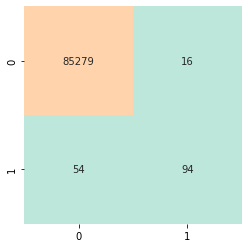

In [24]:

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_logreg))
conf_mat = confusion_matrix(y_test,y_predicted_logreg)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



In [25]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of logistic regression classifier:  0.9878703165326063


## KNN

In [26]:

#Define the model with our best parameters and the resampling:
knn=KNeighborsClassifier(n_neighbors=6)


##fit our pipeline with our training set
knn.fit(X_train,y_train)


# Get predicting values
y_predicted_knn=knn.predict(X_test)


In [27]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_knn))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85292     3]
 [   44   104]]


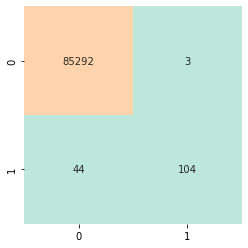

In [28]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_knn))
conf_mat = confusion_matrix(y_test,y_predicted_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()


In [29]:
# Predict probabilities
y_pred_probs_knn = knn.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of knn classifier: ",roc_auc_score(y_test, y_pred_probs_knn))

roc_auc_score of knn classifier:  0.9154124873451914


## Decision Trees

#Let's use GridSearchCV in order to find the best parameters for our decision tree
hyperparameters = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

gridsearch = GridSearchCV(DecisionTreeClassifier(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

In [30]:

#Define the model with our best parameters and the resampling:
dtc= DecisionTreeClassifier()


##fit our pipeline with our training set
dtc.fit(X_train,y_train)


# Get predicting values
y_predicted_dtc=dtc.predict(X_test)

#predicted_y_train=model.predict(X_train)



In [31]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_dtc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.72      0.74       148

    accuracy                           1.00     85443
   macro avg       0.88      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85263    32]
 [   42   106]]


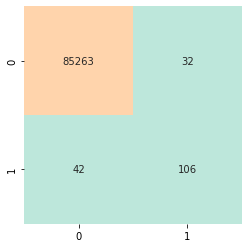

In [32]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_dtc))
conf_mat = confusion_matrix(y_test,y_predicted_dtc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



performance_model = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, predicted_y_train),
                                         precision_score(y_train, predicted_y_train),
                                         recall_score(y_train, predicted_y_train)],
                               'Test': [accuracy_score(y_test, predicted_y_test),
                                        precision_score(y_test, predicted_y_test),
                                        recall_score(y_test, predicted_y_test)]})
display(performance_model)

In [33]:
# Predict probabilities
y_pred_probs_dtc = dtc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of decision tree classifier: ",roc_auc_score(y_test, y_pred_probs_dtc))

roc_auc_score of decision tree classifier:  0.8579205238417384


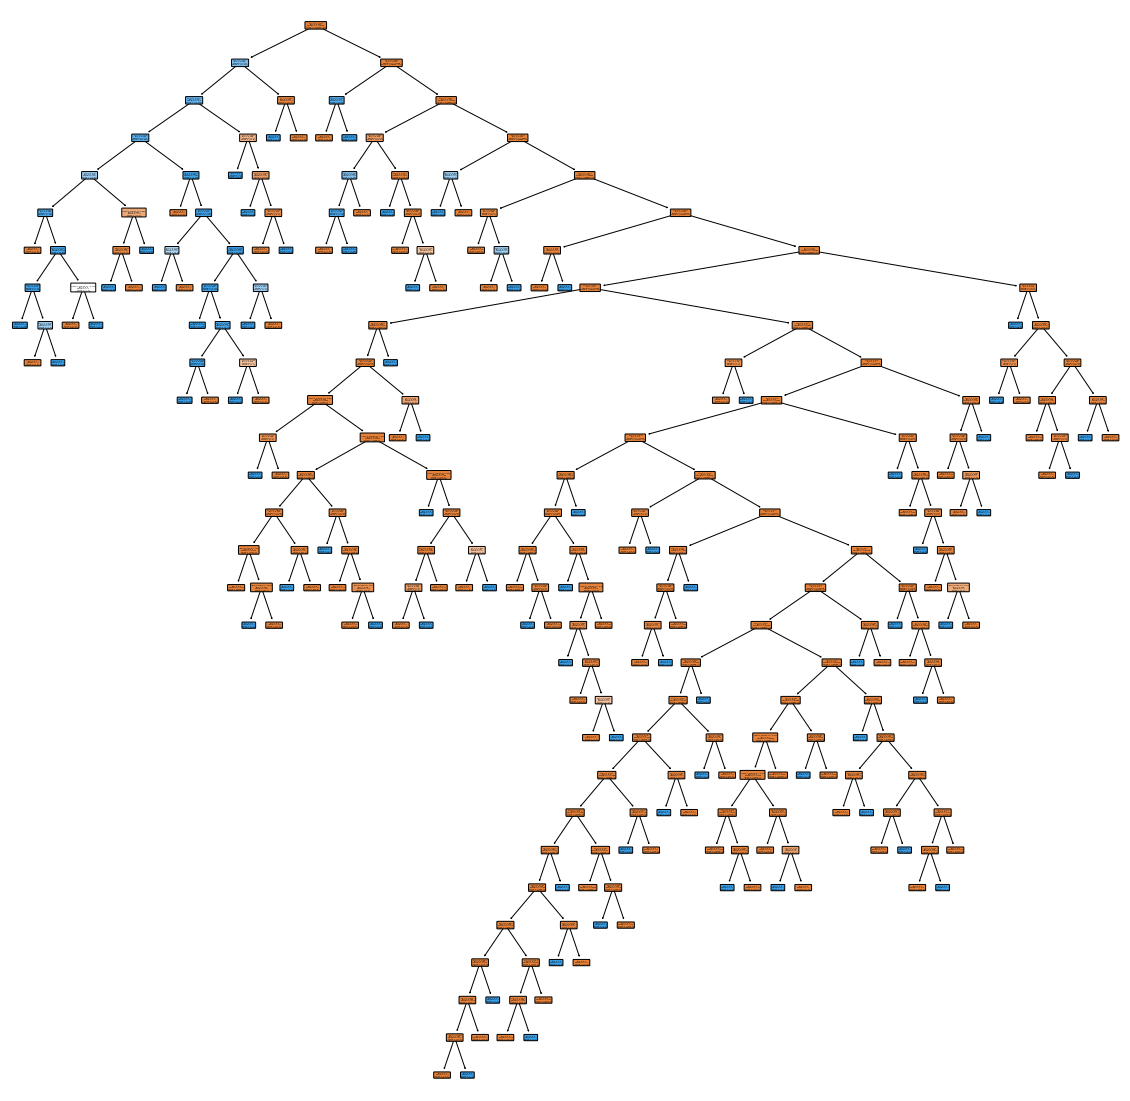

In [34]:
# Tree Representation :
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))


plot_tree(dtc,filled = True, rounded=True,feature_names=X.columns, class_names=['No Fraud', "Fraud"])
plt.show() 

## Random Forest

#Let's use GridSearchCV in order to find the best parameters for our random forest


hyperparameters = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}


gridsearch = GridSearchCV(RandomForestClassifier(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

In [35]:
#Define model with our best parameters
rfc= RandomForestClassifier()


#fit our pipeline with our training set
rfc.fit(X_train,y_train)

# Get predicting values
y_predicted_rfc=rfc.predict(X_test)

#predicted_y_train=model.predict(X_train)

In [36]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_rfc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85292     3]
 [   38   110]]


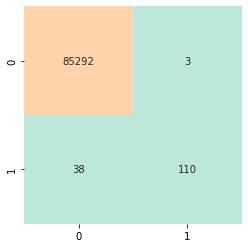

In [37]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_rfc))
conf_mat = confusion_matrix(y_test,y_predicted_rfc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()


In [38]:
# Predict probabilities
y_pred_probs_rfc = rfc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of random forest classifier: ",roc_auc_score(y_test, y_pred_probs_rfc))

roc_auc_score of random forest classifier:  0.941032751198939


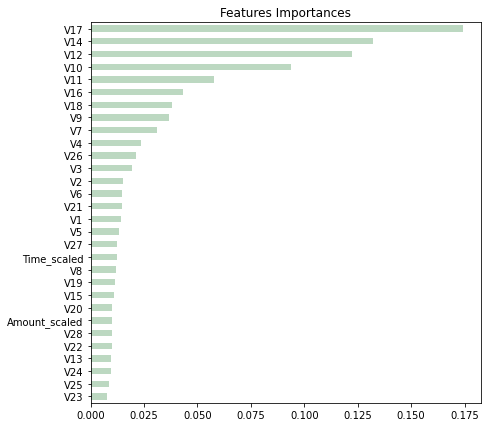

In [39]:
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

## Adaboots
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [51]:


# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dtc, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train,y_train)

# Get predicting values
predicted=ada.predict(X_test)


# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [52]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.76      0.78       148

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85268    27]
 [   36   112]]


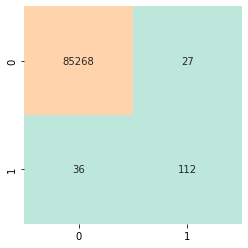

In [53]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted))
conf_mat = confusion_matrix(y_test,predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [54]:
# Predict probabilities
y_pred_probs_ada = ada.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of Adaboots classifier: ",roc_auc_score(y_test,y_pred_probs_ada ))

roc_auc_score of Adaboots classifier:  0.8782201041536289


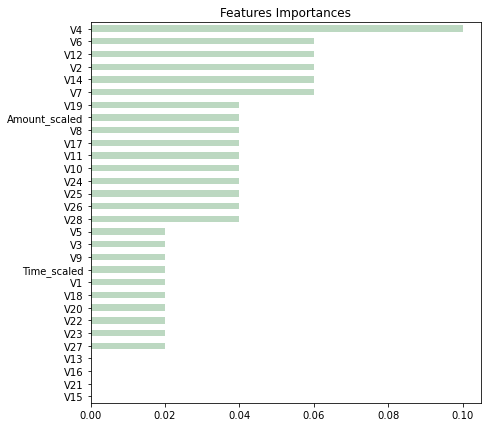

In [44]:
# Create a pd.Series of features importances
importances = pd.Series(data=ada.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

## Gradient Boosting 

In [61]:


# Instantiate ada
gbc= GradientBoostingClassifier()

# Fit ada to the training set
gbc.fit(X_train,y_train)

# Get predicting values
y_predicted_gbc=gbc.predict(X_test)


# Compute the probabilities of obtaining the positive class
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

In [62]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_gbc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.28      0.41       148

    accuracy                           1.00     85443
   macro avg       0.90      0.64      0.71     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85285    10]
 [  107    41]]


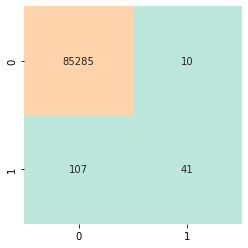

In [63]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_gbc))
conf_mat = confusion_matrix(y_test,y_predicted_gbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [64]:
# Predict probabilities
y_pred_probs_gbc = gbc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of Gradient Booster classifier: ",roc_auc_score(y_test,y_pred_probs_gbc ))

roc_auc_score of Gradient Booster classifier:  0.42226743274137607


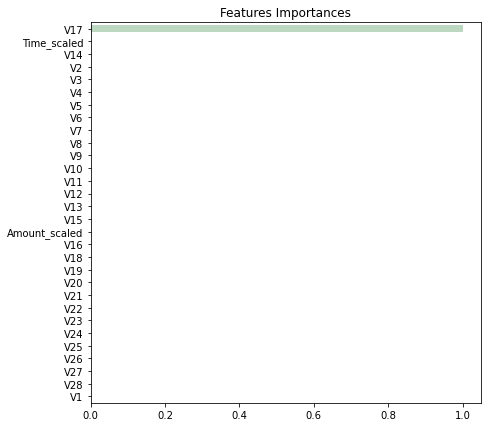

In [60]:
# Create a pd.Series of features importances
importances = pd.Series(data=gbc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 

## Model Comparison

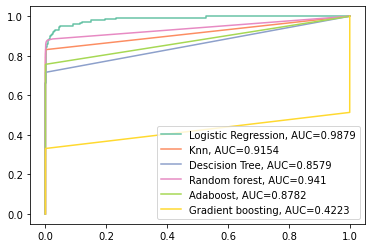

In [65]:
#logistic regression
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))




#knn
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_knn), 4)
plt.plot(fpr,tpr,label="Knn, AUC="+str(auc))



#decision tree
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_dtc)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_dtc), 4)
plt.plot(fpr,tpr,label="Descision Tree, AUC="+str(auc))


#random forest
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_rfc)
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_rfc), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))


#adaboost
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_ada )
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_ada), 4)
plt.plot(fpr,tpr,label="Adaboost, AUC="+str(auc))

#gradient Boosting
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_gbc )
auc = round(metrics.roc_auc_score(y_test, y_pred_probs_gbc), 4)
plt.plot(fpr,tpr,label="Gradient boosting, AUC="+str(auc))

plt.legend()


## Logistic Regression with hyperparameter tunning

In [66]:
#Let's use GridSearch in order to find the best parameters for our logistic Regression model:

#First we define the evaluation metrics:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#We create a dictionary for our hyperparameters:
hyperparameters = {"penalty": ['none', 'l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver" : ['newton-cg', 'lbfgs', 'liblinear']}

gridsearch = GridSearchCV(LogisticRegression(), hyperparameters, scoring='accuracy', n_jobs=-1, cv=cv)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.best_params_)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.99920246 0.99920079        nan        nan        nan 0.99849187
 0.9990152  0.9990152  0.99907205        nan        nan        nan
 0.99920246 0.99920079        nan        nan        nan 0.99910549
 0.99915565 0.99915565 0.99914729        nan        nan        nan
 0.99920246 0.99920079        nan        nan        nan 0.99918909
 0.9991824  0.9991824  0.99917906        nan        nan        nan
 0.99920246 0.99920079        nan        nan        nan 0.99918574
 0.9991941  0.9991941  0.99918407        nan        nan        nan
 0.99920246 0.99920079        nan        nan        nan 0.99920079
 0.99920079 0.99920079 0.99920079        nan        nan        nan
 0.99920246 0.99920079        nan        nan        nan 0.99920079
 0.99920079 0.99920079 0.99920246        nan        nan        nan
 0.99920246 0.99920079        nan       

{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}


In [67]:
#Define our model
logreg=LogisticRegression(C=0.001,penalty="none",solver='newton-cg')

#fit our the model with our training set
logreg.fit(X_train,y_train)


# Get predicting values

y_predicted_logreg=logreg.predict(X_test)
#predicted_y_train=model.predict(X_train)


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [68]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,y_predicted_logreg))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix for the test set
[[85279    16]
 [   54    94]]


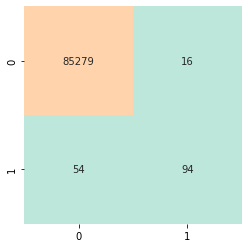

In [69]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_predicted_logreg))
conf_mat = confusion_matrix(y_test,y_predicted_logreg)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [70]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of logistic regression classifier:  0.9876103285418018


Conclusions:
    Data analysis with imbalance data is bias. All our model are better predicting the class 0 
    Possible overfitting
    

##  Synthetic Minority Oversampling Technique (SMOTE)

In order to treat the data imbanlance we can use oversampling and undersampling techniques. SMOTE is an oversampling technique. 

In [73]:

X=df.iloc[:,0:30].values
y=df.Class.values

In [74]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 30)
y shape: (284807,)


In [75]:

# Define the resampling method
method = SMOTE(random_state=42)


In [76]:
# Create the resampled feature set
X_sm, y_sm = method.fit_resample(X, y)

In [77]:
pd.value_counts(pd.Series(y_sm))


0    284315
1    284315
dtype: int64

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


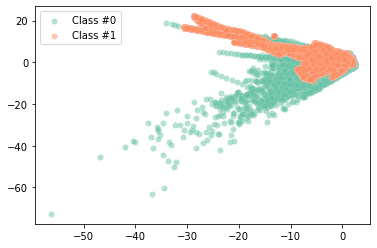

In [78]:
# Plot the resampled data
plot_data(X_sm, y_sm)

In [83]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    sns.set_palette("Set2")
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_sm[y_sm == 0, 0], X_sm[y_sm == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_sm[y_sm == 1, 0], X_sm[y_sm == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    plt.title(method)
    plt.legend()
    plt.show()

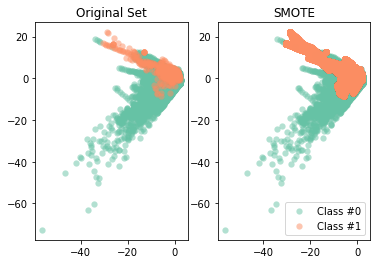

In [84]:
compare_plot(X, y, X_sm, y_sm, method='SMOTE')

## Logistic Regression combined with SMOTE

In [85]:


#Define the resampling method and the model the model:
resampling = SMOTE()
model = LogisticRegression(C=0.1)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# XY split:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000,stratify=y)


#fit the pipeline into the training set:
pipeline.fit(X_train, y_train) 

#Get predictions:
predicted_sm = pipeline.predict(X_test)

In [86]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted_sm))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.93      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



Confusion matrix for the test set
[[83359  1936]
 [   11   137]]


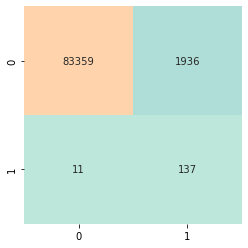

In [87]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted_sm))
conf_mat = confusion_matrix(y_test,predicted_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [88]:
# Predict probabilities
y_pred_probs = model.predict_proba(X_test)[:,1]

In [90]:
#Calculate the accuracy
print("accuracy for logistic regression combined with SMOTE: ",accuracy_score(y_test, predicted_sm))

accuracy for logistic regression combined with SMOTE:  0.9772128787612795


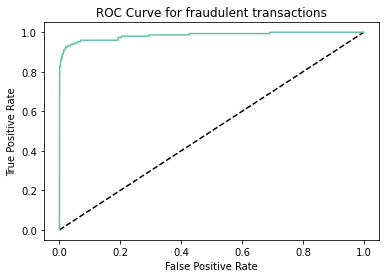

roc_auc_score of logistic regression classifier:  0.9837853285021936


In [91]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for fraudulent transactions')
plt.show()



#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

In [ ]:
models = {"Logistic Regression": logreg, "Decision Trees": dtc, "Random Forest": rfc}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
model_pipeline = [ logreg,dtc,rfc]
model_names = ['Logistic Regresion','Decision Tree','Random Forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)